## Driver file to show-case FOSF(First Order Statistical Features) functions written in FOSF_Methods.py
These functions are defined in FOSF_Methods
- Good old classical statistical features 
    - **mean**: To compute mean 
    - **median**: To compute median 
    - **variance**: To calculate variance 
    - **std_dev**: To calculate standard deviation 
    - **skewness**: To calculate skewness 
    - **kurtosis**: To calculate kurtosis
    - **mad**: To calculate Mean Absolute Deviation
    - **mead**: To calculate Median Absolute Deviation
    - **local_contrast**: To calculate local contrast
    - **local_probablities**: To calculate local probablities (for an intensity value, e.g. 178)
    - **percetile_25**: To calculate percetile 25
    - **percetile_75**: To calculate percetile 75


    **Note:** All of these functions operate on a defined patch within the image    

- **konv**
    - Used to perform convolution in **Khurram** fashion :)
        - Special param: 
          - operation/method: It takes a special params which is the method to be applied after conv.


In [1]:
import numpy as np
from filtering import konv, pad
from util import show_im
from FOSF_Methods import mean, median, variance, std_dev, skewness, kurtosis, mad, mead, local_contrast, local_probablities, percetile_25, percetile_75
import imageio.v3 as io
import matplotlib.pyplot as plt
import cv2

In [2]:
F1 = np.zeros(shape=(5,5), dtype="uint8")
img = io.imread("original.png")

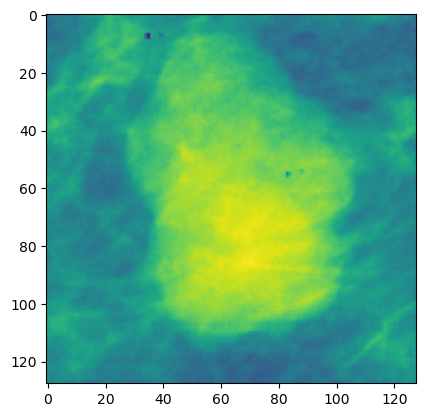

In [3]:
plt.imshow(img)

In [4]:
all_methods = [mean, median, variance, std_dev, skewness, kurtosis, mad, mead, local_contrast, local_probablities, percetile_25, percetile_75]
file_names = ["mean", "median", "variance", "std_dev", "skewness", "kurtosis", "mad", "mead", "local_contrast", "local_probablities_178", "percetile_25", "percetile_75"]

In [ ]:
output = []
for i in range(len(all_methods)):
    method = all_methods[i]
    img_name = "output/" + file_names[i] + ".png"
    after_img = konv(img,F1, method, normalize=True)
    output.append(after_img)
    cv2.imwrite(img_name, after_img) 

['mean', 'median', 'variance', 'std_dev', 'skewness', 'kurtosis', 'mad', 'mead', 'local_contrast', 'local_probablities_178', 'percetile_25', 'percetile_75']


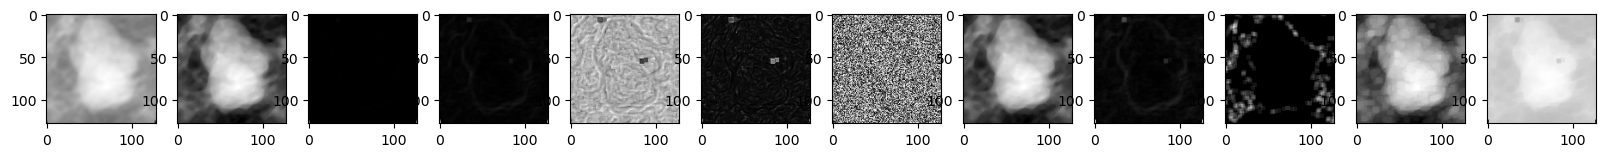

In [6]:
show_im(output, file_names)

In [7]:
def get_features_at(I, i,j, kernel_size=(5,5)):
    K = np.zeros(shape=kernel_size)
    mr, mc = K.shape
    padd_width_r = mr // 2
    padd_width_c = mc // 2
    
    I_pad = pad(I, padd_width_r)

    center_i = i + padd_width_r
    center_j = j + padd_width_c
    
    for k in range(mr):
        for l in range(mc):
            patch_i = center_i - padd_width_r
            patch_j = center_j - padd_width_c                  
            K[k, l] = I_pad[patch_i + k , patch_j + l]

    feature_vector = []
    for i in range(len(all_methods)):
        method = all_methods[i]
        y = method(K)
        feature_vector.append(y)
    return feature_vector

In [8]:
get_features_at(img, 0, 0)

[164.92,
 165.0,
 2.576666666666667,
 1.572768260107,
 0.19385566618004282,
 3.3318056529473936,
 1.2505552149377763e-14,
 165.0,
 6.0,
 0,
 168.0,
 162.0]